In [3]:
import numpy as np
import zipfile


In [6]:
GLOVE_DIR = '../data/'
GLOVE_ZIP = GLOVE_DIR + 'glove.6B.50d.txt.zip'
print(GLOVE_ZIP)
 

zip_ref = zipfile.ZipFile(GLOVE_ZIP, 'r')
zip_ref.extractall(GLOVE_DIR)
zip_ref.close()


../data/glove.6B.50d.txt.zip


In [7]:
def load_glove_vectors(fn):
    print("Loading Glove Model")
    with open( fn,'r', encoding='utf8') as glove_vector_file:
        model = {}
        for line in glove_vector_file:
            parts = line.split()
            word = parts[0]
            embedding = np.array([float(val) for val in parts[1:]])
            model[word] = embedding
        print("Loaded {} words".format(len(model)))
    return model
 
glove_vectors = load_glove_vectors(GLOVE_DIR +'glove.6B.50d.txt')


Loading Glove Model
Loaded 400000 words


In [8]:
glove_vectors

{'clemenceau': array([ 1.1545  ,  0.27887 ,  0.3753  , -0.91362 , -1.1526  ,  0.57921 ,
        -0.15574 ,  0.96899 ,  0.10389 , -0.54932 ,  0.29918 ,  1.074   ,
         0.21776 ,  1.0756  , -0.62561 , -0.094033, -0.47619 ,  0.32917 ,
        -0.26305 , -0.31986 ,  0.25751 , -0.50803 , -1.0427  , -0.24785 ,
         0.61192 , -0.80458 ,  0.011103,  0.68391 ,  0.39234 ,  0.98828 ,
        -1.2555  , -0.29098 , -0.18738 ,  0.69223 ,  0.013039, -0.49585 ,
         0.81886 ,  0.010434, -0.075721,  0.39294 ,  0.34556 , -0.33408 ,
         1.1307  , -0.61635 , -0.19228 ,  1.2374  , -1.4194  , -0.02357 ,
         0.84883 , -0.59741 ]),
 'kmgh': array([-0.50633 ,  0.90443 ,  0.90077 ,  0.61904 , -1.1599  , -0.86196 ,
        -0.45138 ,  0.63752 ,  0.36882 ,  0.8899  ,  0.076426, -0.30493 ,
        -0.23918 ,  1.0337  ,  0.067868,  0.38734 , -0.59662 ,  0.16064 ,
         0.5605  ,  1.0229  ,  0.19147 ,  0.61808 ,  0.40941 ,  0.93068 ,
        -0.69986 , -0.37798 , -0.040327,  0.45809 , -0.237

In [9]:
glove_vectors["dog"]

array([ 0.11008  , -0.38781  , -0.57615  , -0.27714  ,  0.70521  ,
        0.53994  , -1.0786   , -0.40146  ,  1.1504   , -0.5678   ,
        0.0038977,  0.52878  ,  0.64561  ,  0.47262  ,  0.48549  ,
       -0.18407  ,  0.1801   ,  0.91397  , -1.1979   , -0.5778   ,
       -0.37985  ,  0.33606  ,  0.772    ,  0.75555  ,  0.45506  ,
       -1.7671   , -1.0503   ,  0.42566  ,  0.41893  , -0.68327  ,
        1.5673   ,  0.27685  , -0.61708  ,  0.64638  , -0.076996 ,
        0.37118  ,  0.1308   , -0.45137  ,  0.25398  , -0.74392  ,
       -0.086199 ,  0.24068  , -0.64819  ,  0.83549  ,  1.2502   ,
       -0.51379  ,  0.04224  , -0.88118  ,  0.7158   ,  0.38519  ])

In [10]:
glove_vectors["cat"]

array([ 0.45281 , -0.50108 , -0.53714 , -0.015697,  0.22191 ,  0.54602 ,
       -0.67301 , -0.6891  ,  0.63493 , -0.19726 ,  0.33685 ,  0.7735  ,
        0.90094 ,  0.38488 ,  0.38367 ,  0.2657  , -0.08057 ,  0.61089 ,
       -1.2894  , -0.22313 , -0.61578 ,  0.21697 ,  0.35614 ,  0.44499 ,
        0.60885 , -1.1633  , -1.1579  ,  0.36118 ,  0.10466 , -0.78325 ,
        1.4352  ,  0.18629 , -0.26112 ,  0.83275 , -0.23123 ,  0.32481 ,
        0.14485 , -0.44552 ,  0.33497 , -0.95946 , -0.097479,  0.48138 ,
       -0.43352 ,  0.69455 ,  0.91043 , -0.28173 ,  0.41637 , -1.2609  ,
        0.71278 ,  0.23782 ])

### the below method is just for test case and is not in exercise

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
 
def to_vector(glove_vectors, word):
    vector = glove_vectors.get(word.lower())
    if vector is None:
        vector = [0] * 50
    return vector 
 
def to_image(vector, word=''):
    fig, ax = plt.subplots(1,1)
    ax.tick_params(axis='both', which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    ax.bar(range(len(vector)), vector, 0.5)
    ax.text(s=word, x=1, y=vector.max()+0.5)
    return vector


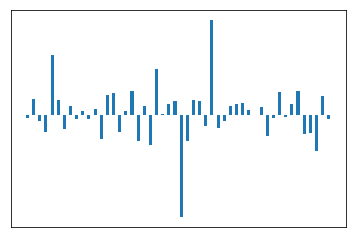

In [12]:
man = to_image(to_vector(glove_vectors, "man"))

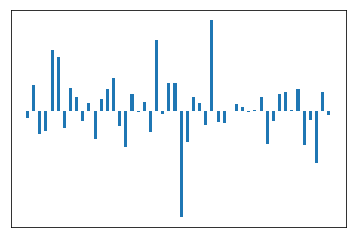

In [13]:
woman = to_image(to_vector(glove_vectors, "woman"))

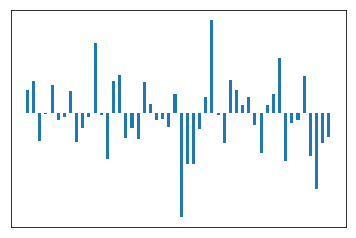

In [14]:
king = to_image(to_vector(glove_vectors, "king"))


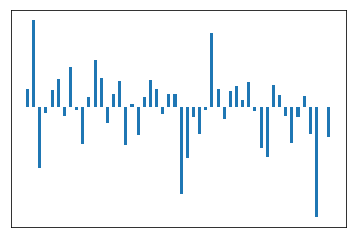

In [15]:
queen = to_image(to_vector(glove_vectors, "queen"))

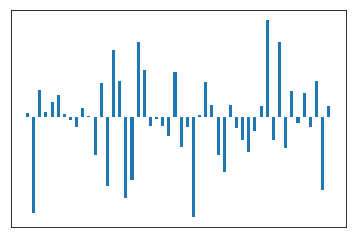

In [16]:
diff = to_image(king - man + woman - queen)

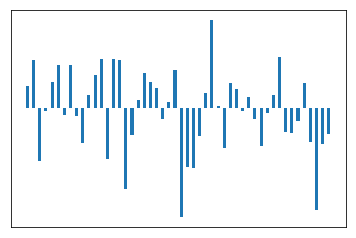

In [17]:
nd = to_image(king - man + woman)